In [1]:
# CCA tutorial : https://stats.idre.ucla.edu/r/dae/canonical-correlation-analysis/


In [4]:
require(ggplot2)
require(GGally)
require(CCA)

Loading required package: CCA
Loading required package: fda
Loading required package: splines
Loading required package: Matrix

Attaching package: ‘fda’

The following object is masked from ‘package:graphics’:

    matplot

Loading required package: fields
Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.1-2 (2017-12-21) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve

Loading required package: maps
See www.image.ucar.edu/~nychka/Fields for
 a vignette and other supplements. 


In [3]:
install.packages("CCA")

also installing the dependencies ‘dotCall64’, ‘spam’, ‘maps’, ‘fda’, ‘fields’




  There are binary versions available but the source versions are later:
          binary  source needs_compilation
dotCall64  0.9-5 0.9-5.2              TRUE
fields       9.0     9.6              TRUE


The downloaded binary packages are in
	/var/folders/mt/fwl9tbgx16qdzrtqh_8t_8rm0000gp/T//RtmpzwBetg/downloaded_packages


installing the source packages ‘dotCall64’, ‘fields’



In [5]:
mm <- read.csv("https://stats.idre.ucla.edu/stat/data/mmreg.csv")
colnames(mm) <- c("Control", "Concept", "Motivation", "Read", "Write", "Math", 
    "Science", "Sex")
summary(mm)


    Control            Concept            Motivation          Read     
 Min.   :-2.23000   Min.   :-2.620000   Min.   :0.0000   Min.   :28.3  
 1st Qu.:-0.37250   1st Qu.:-0.300000   1st Qu.:0.3300   1st Qu.:44.2  
 Median : 0.21000   Median : 0.030000   Median :0.6700   Median :52.1  
 Mean   : 0.09653   Mean   : 0.004917   Mean   :0.6608   Mean   :51.9  
 3rd Qu.: 0.51000   3rd Qu.: 0.440000   3rd Qu.:1.0000   3rd Qu.:60.1  
 Max.   : 1.36000   Max.   : 1.190000   Max.   :1.0000   Max.   :76.0  
     Write            Math          Science           Sex       
 Min.   :25.50   Min.   :31.80   Min.   :26.00   Min.   :0.000  
 1st Qu.:44.30   1st Qu.:44.50   1st Qu.:44.40   1st Qu.:0.000  
 Median :54.10   Median :51.30   Median :52.60   Median :1.000  
 Mean   :52.38   Mean   :51.85   Mean   :51.76   Mean   :0.545  
 3rd Qu.:59.90   3rd Qu.:58.38   3rd Qu.:58.65   3rd Qu.:1.000  
 Max.   :67.10   Max.   :75.50   Max.   :74.20   Max.   :1.000  

In [6]:
xtabs(~Sex, data = mm)

Sex
  0   1 
273 327 

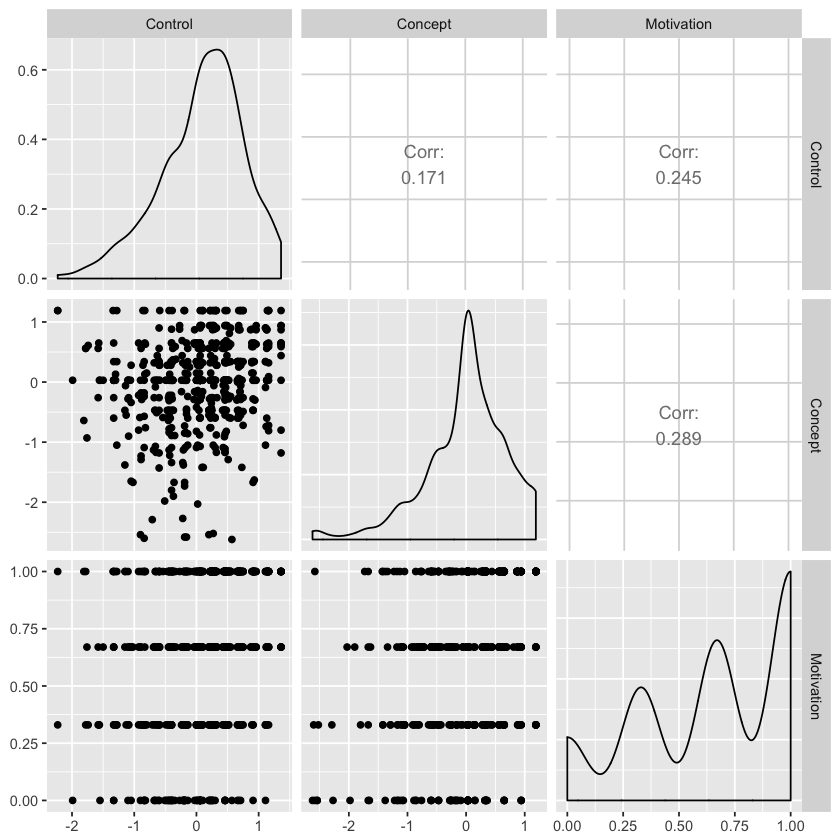

In [7]:
psych <- mm[, 1:3]
acad <- mm[, 4:8]

ggpairs(psych)

In [8]:
head(mm)

Control,Concept,Motivation,Read,Write,Math,Science,Sex
-0.84,-0.24,1.00,54.8,64.5,44.5,52.6,1
-0.38,-0.47,0.67,62.7,43.7,44.7,52.6,1
0.89,0.59,0.67,60.6,56.7,70.5,58.0,0
0.71,0.28,0.67,62.7,56.7,54.7,58.0,0
-0.64,0.03,1.00,41.6,46.3,38.4,36.3,1
1.11,0.90,0.33,62.7,64.5,61.4,58.0,1


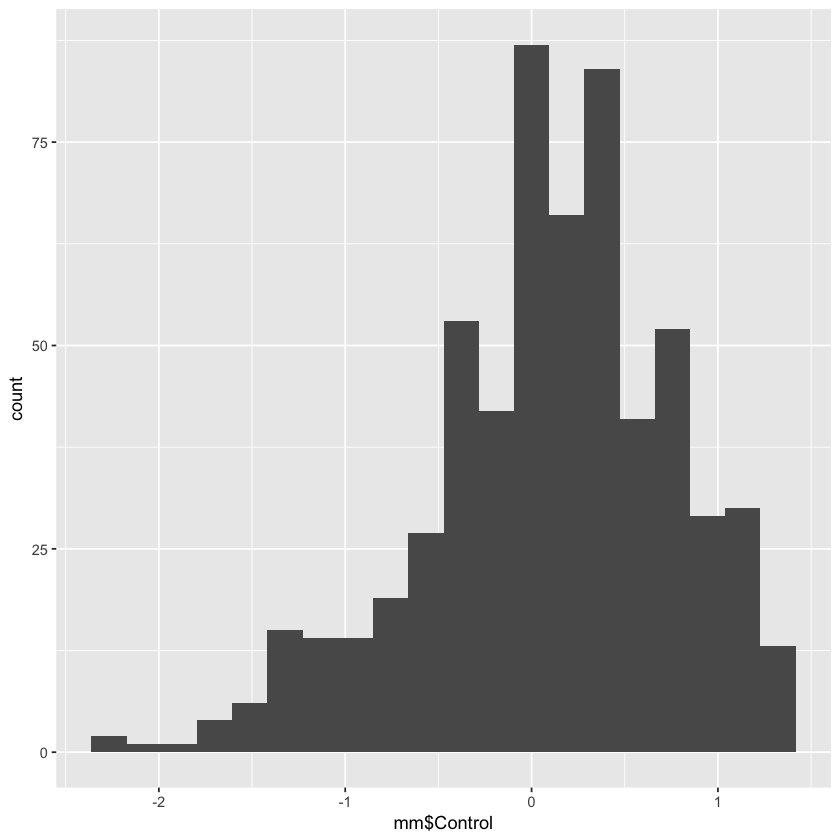

In [14]:
qplot(mm$Control, geom="histogram", bins=20) 

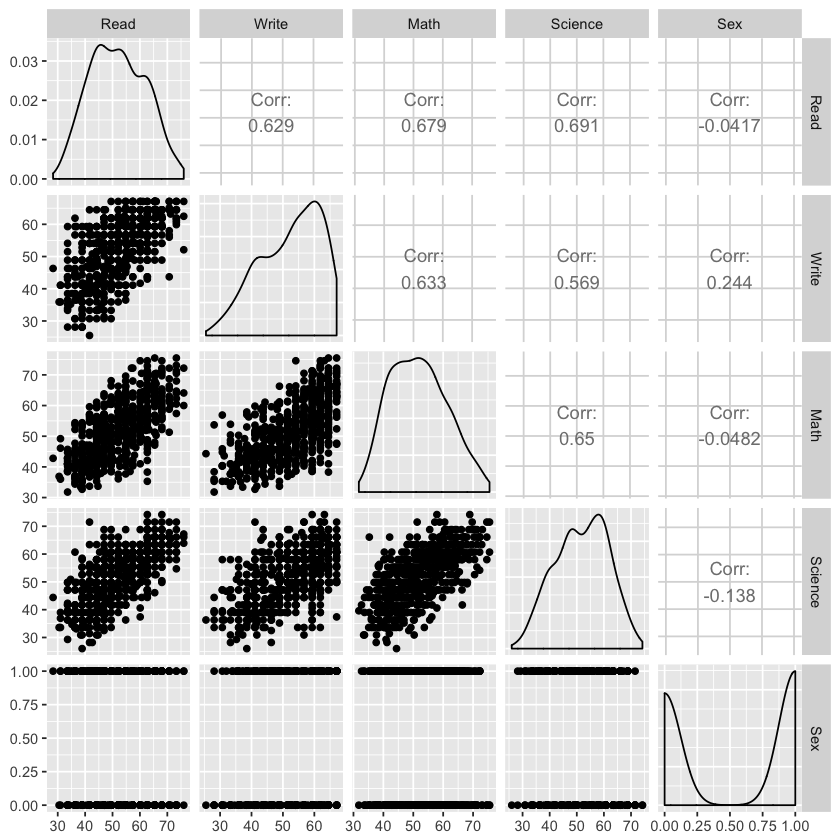

In [9]:
ggpairs(acad)


In [10]:
head(acad)

Read,Write,Math,Science,Sex
54.8,64.5,44.5,52.6,1
62.7,43.7,44.7,52.6,1
60.6,56.7,70.5,58.0,0
62.7,56.7,54.7,58.0,0
41.6,46.3,38.4,36.3,1
62.7,64.5,61.4,58.0,1


In [11]:
matcor(psych, acad)

$Xcor
             Control   Concept Motivation
Control    1.0000000 0.1711878  0.2451323
Concept    0.1711878 1.0000000  0.2885707
Motivation 0.2451323 0.2885707  1.0000000

$Ycor
               Read     Write       Math    Science         Sex
Read     1.00000000 0.6285909  0.6792757  0.6906929 -0.04174278
Write    0.62859089 1.0000000  0.6326664  0.5691498  0.24433183
Math     0.67927568 0.6326664  1.0000000  0.6495261 -0.04821830
Science  0.69069291 0.5691498  0.6495261  1.0000000 -0.13818587
Sex     -0.04174278 0.2443318 -0.0482183 -0.1381859  1.00000000

$XYcor
             Control     Concept Motivation        Read      Write       Math
Control    1.0000000  0.17118778 0.24513227  0.37356505 0.35887684  0.3372690
Concept    0.1711878  1.00000000 0.28857075  0.06065584 0.01944856  0.0535977
Motivation 0.2451323  0.28857075 1.00000000  0.21060992 0.25424818  0.1950135
Read       0.3735650  0.06065584 0.21060992  1.00000000 0.62859089  0.6792757
Write      0.3588768  0.01944856 0.25424818  0.62859089 1.00000000  0.6326664
Math       0.3372690  0.05359770 0.19501347  0.67927568 0.63266640  1.0000000
Science    0.3246269  0.06982633 0.11566948  0.69069291 0.56914983  0.6495261
Sex        0.1134108 -0.12595132 0.09810277 -0.04174278 0.24433183 -0.0482183
               Science         Sex
Control     0.32462694  0.11341075
Concept     0.06982633 -0.12595132
Motivation  0.11566948  0.09810277
Read        0.69069291 -0.04174278
Write       0.56914983  0.24433183
Math        0.64952612 -0.04821830
Science     1.00000000 -0.13818587
Sex        -0.13818587  1.00000000

In [12]:
hist(mm)

ERROR: Error in hist.default(mm): 'x' must be numeric


In [15]:
cc1 <- cc(psych, acad)

# display the canonical correlations
cc1$cor

[1] 0.4640861 0.1675092 0.1039911

In [16]:
# raw canonical coefficients
cc1[3:4]

Control,-1.2538339,-0.6214776,-0.6616896
Concept,0.3513499,-1.1876866,0.8267210
Motivation,-1.2624204,2.0272641,2.0002283
Read,-0.044620600,-0.004910024,0.021380576
Write,-0.035877112,0.042071478,0.091307329
Math,-0.023417185,0.004229478,0.009398182
Science,-0.005025152,-0.085162184,-0.109835014
Sex,-0.632119234,1.084642326,-1.794647036


In [17]:
# compute canonical loadings
cc2 <- comput(psych, acad, cc1)

# display canonical loadings
cc2[3:6]


Control,-0.90404631,-0.3896883,-0.1756227
Concept,-0.02084327,-0.7087386,0.7051632
Motivation,-0.56715106,0.3508882,0.7451289
Read,-0.3900402,-0.06010654,0.01407661
Write,-0.4067914,0.01086075,0.02647207
Math,-0.3545378,-0.04990916,0.01536585
Science,-0.3055607,-0.11336980,-0.02395489
Sex,-0.1689796,0.12645737,-0.05650916
Control,-0.419555307,-0.06527635,-0.01826320
Concept,-0.009673069,-0.11872021,0.07333073
Motivation,-0.263206910,0.05877699,0.07748681


In [24]:
latent_one <- (-0.90405 * psych$Control + -0.56715106 * psych$Motivation + -0.02084327 * psych$Concept)

In [25]:
latent_two <- (-0.3900402 * acad$Read + -0.4067914 * acad$Write +  -0.3545378 * acad$Math + -0.3055607 * acad$Science +  -0.1689796 * acad$Sex)

In [26]:
cor(latent_one, latent_two)


[1] 0.431429